In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df["label"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
# 看看有几个
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

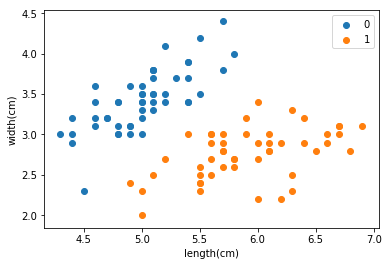

In [16]:
plt.scatter(df[:50]["sepal length (cm)"],df[:50]["sepal width (cm)"],label = "0")
plt.scatter(df[51:100]["sepal length (cm)"],df[51:100]["sepal width (cm)"],label = "1")
plt.xlabel("length(cm)")
plt.ylabel("width(cm)")
plt.legend()
plt.show()

In [38]:
data =df.values[:100]
np.random.shuffle(data)
x_train , y = data[:,:2],data[:,-1]
# data = np.concatenate(x_train,y,axis=1)
# x_train , y = data[:,]
y_train = np.array([1 if i==1 else -1 for i in y])



array([-1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1])

In [39]:
import random
class Model:
    def __init__(self):
        self.w = np.ones(2,dtype=np.float32)
        self.b = 0
        self.lr = 0.1
    def sign(self,x,w,b):
        y = np.dot(x,w)+b
        return y
#     SGD
    def SGD(self,x_data,y_data):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for i in range(len(x_data)):
                y = y_data[i]
                if y*self.sign(x_data[i],self.w,self.b)<=0:
                    self.w = self.w + self.lr*np.dot(x_data[i],y)
                    self.b = self.b + self.lr*y
                    wrong_count +=1
            is_wrong = False if wrong_count!=0 else True
        return 'Model is finished'
    
    

In [40]:
perceptron = Model()
print(perceptron.SGD(x_train,y_train))

Model is finished


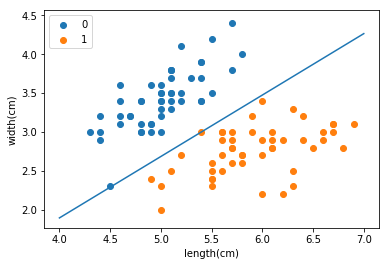

In [43]:
x_points = np.linspace(4, 7,10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.scatter(df[:50]["sepal length (cm)"],df[:50]["sepal width (cm)"],label = "0")
plt.scatter(df[51:100]["sepal length (cm)"],df[51:100]["sepal width (cm)"],label = "1")
plt.xlabel("length(cm)")
plt.ylabel("width(cm)")
plt.legend()
plt.show()